- In the previous chapter, we looked at linear regression
    - Linear regression is a supervised method for machine learning
        - Rooted in statistics
        - Forecasts the target using either continous or binary variables
    - In simple linear regression, we assume that the relationship between the predictor variable and the target variable is **linear**
- In most cases, one predictor variable isn't enough to accurately predict the value of the target variable
    - We usually have to consider several predictor variables and how they interact with each other to create an accurate model

- As we expand the number of predictors past one variable, we can **no longer represent the data on a simple plot**

- Also, we don't just consider the interaction between each predictor and the target variable
    - We now need to consider the interaction **between the different predictor variables**
        - This interaction is called **multicollinearity**

____

# Using multiple features

- First, we'll import and prepare all the libraries and data that we'll need

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model

In [197]:
%matplotlib inline

In [198]:
plt.rcParams['figure.figsize'] = 10, 10

In [199]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

In [200]:
n_observations = len(df)
variables = list(boston.feature_names)
X = df.iloc[:,:-1]
y = df['target'].values

_____

# Model building using Statsmodels

In [201]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

- Recall from the last chapter, we need to add an intercept column to $X$

In [202]:
Xc = sm.add_constant(X)

In [203]:
linear_regression = sm.OLS(y, Xc)

In [204]:
fitted_model = linear_regression.fit()

In [205]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 16 Aug 2018   Prob (F-statistic):          6.95e-135
Time:                        17:08:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### In the last chapter, [we discussed what some of these statistics mean](02-Approaching-Simple-Linear-Regression.ipynb#Glossary)

- However, we glossed over the Adjusted R-squared since it wasn't applicable for simple linear regressions

### Adjusted R-squared

- When working with multiple predictor variables, the standard R-squared measure can **become inflated** (i.e. implies the model is better than it truly is)
    - The adjusted R-squared statistic **accounts for the complexity of the model** and is therefore a more accurate representation of the predictiveness of the model

#### Note: take the ratio of $\frac{\text{R-squared}}{\text{Adj. R-sqared}}$ and if it's bigger than 1.2, we know we have some redundant variables in our model

- In our model above, the ratio is $\frac{0.741}{0.734}\approx 1.01$

### Noisy coefficients

- We also need to check our coefficients
    - There's a risk that they'll pick up noisy and non-valuable information
- The bad coefficients usually have:
    - value close to zero
    - large standard error
- The best tool to spot them: **t-tests**

#### If we have a coefficient that's close to zero and has a LOW p-value, this means that it's highly unlikely that the variable is useful in making predictions

#### Similarly, if we have a coefficient of any value but with a HIGH p-value, this means that it's not very likely that this is the true coefficient for the variable

- For example, the p-values for `INDUS` and `AGE` are very high
    - This means we should have little confidence in the predictiveness of the model with respect to these variables

### Cond. No.

- This value isn't very meaningful for models with a single variable, but becomes significant in our new model
- The metric tells us whether the **results are unstable** when trying to optimize using matrix conversion
    - This **instability is caused by multicollinearity**
- If the Cond. No. value is **greater than 30**, we know that we can't trust the results
    - Even a very similar subset of the training data can lead to a vastly different model

______

# Correlation Matrix

- For the simple linear regression in the last chapter, we calculated the **Pearson correlation coefficient**
    - This tells us the linear association between the predictor variable and the target
- For more predictor variables, we're still interested in the relationship between each predictor and the target
    - **We also have to check, however, the correlation between the different predictor variables**
        - We want to discern whether the variance is unique or shared

#### Partial Correlation

- This is the **unique** variance between a predictor and the target
- This represents the **exclusive contribution** of a variable to predicting the response

#### (Multi)Collinearity

- This is the **shared** variance
- This can be caused when one predictor causes variance in another predictor which causes variance in the target
- If we're considering **two** predictors, it's called **collinearity**
    - If it's **more than two**, it's called **multicollinearity**

- From a statistical approach, high levels of multicollinearity will cause matrix inversion to fail
    - This means that we can't really trust our coefficients
        - The standard errors will be large

- If a model's variables are multicollinear, it's hard to tell which predictors are the important ones
    - This leads to poor model prediction
        - We'll need to crank up the number of observations

#### Easiest way to check for multicollinearity: a correlation matrix

In [206]:
df_corr = X.corr()

highlight_vals = lambda x: 'background-color: yellow' if 1>abs(x)>=0.7 else ''

df_corr.style.applymap(highlight_vals)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1,-0.199458,0.404471,-0.0552953,0.417521,-0.21994,0.350784,-0.377904,0.622029,0.579564,0.28825,-0.377365,0.45222
ZN,-0.199458,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995
INDUS,0.404471,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038
CHAS,-0.0552953,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293
NOX,0.417521,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.21994,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993


- As we can see, some of these correlation values are pretty high
    - We can explain some of these pretty easily
    
- `NOX` represents the amount of pollution
- `DIS` represents the distance to employment centers
- `INDUS` represents the number of non-residential or commercial buildings in the area
- `TAX` represents the property tax rate

- We can also use a heat map to visualize these correlations

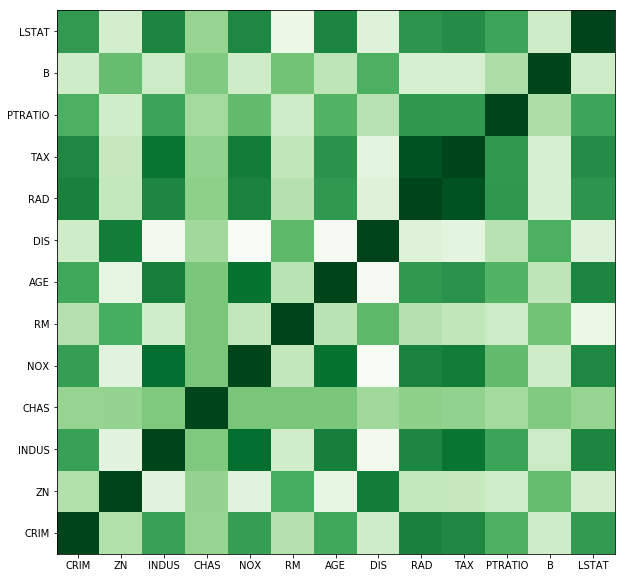

In [207]:
plt.pcolor(df_corr, cmap = 'Greens')
ticks, labels = [x+0.5 for x in range(len(df_corr.index))], list(df_corr.index)
plt.yticks(ticks, labels)
plt.xticks(ticks, labels)
plt.show()

#### Another way to look at multicollinearity: eigenvectors

- The eigenvalues that we derive tell us the amound of recombined variance for each additional variable

In [208]:
eigenvalues, eigenvectors = np.linalg.eig(df_corr)

- Now that we've calculated the eigenvalues, we look at the smallest ones

In [209]:
eigenvalues

array([6.12265476, 1.43206335, 1.24116299, 0.85779892, 0.83456618,
       0.65965056, 0.53901749, 0.39654415, 0.06351553, 0.27743495,
       0.16916744, 0.18616388, 0.22025981])

- The minimum value of 0.06351553 occurs at index 8

In [210]:
eigenvalues[8]

0.06351552722222045

- Let's look at the eigenvector in index 8

In [211]:
pd.DataFrame(eigenvectors, index = df_corr.index)[8]

CRIM      -0.045528
ZN         0.080899
INDUS      0.251267
CHAS      -0.035904
NOX       -0.043890
RM        -0.045805
AGE        0.038707
DIS        0.018284
RAD        0.633373
TAX       -0.720243
PTRATIO   -0.023509
B          0.004850
LSTAT     -0.024772
Name: 8, dtype: float64

- As we can see, the most significant values in this eigenvector are for
    1. `INDUS`
    2. `RAD`
    3. `TAX`
    
- **This suggests that these are the most correlated predictor variables**

______

# Gradient descent revisited

- In the last section, we [showed the steps of gradient descent](02-Approaching-Simple-Linear-Regression.ipynb#Gradient-descent-at-work)
    - When we introduce more variables to the model, the math remains the same
- **Note**: as we add more variables to our model, we can't graph the relationship with a simple plot
    - We'd need to graph a plane (or hyperplane) which isn't that illustrative

______

# Feature scaling

- Multicollinearity makes it really hard to invert the matrix in the pseudoinverse method
- Gradient descent, however, is **not affected by this problem**

#### It's not a perfect method, though

- The scales of the features can be different
- In our housing example:
    - The `RM` variable gives the average number of rooms
    - The `NOX` variable gives the percentage of certain pollutants in the air
    - The `DIS` variable gives the average distance to the employment centre
- When the features have different scales, the optimization will be dominated by the bigger scale variables

#### Solution: feature scaling

- This means **adjusting the variables so their scales are all the same**

- There are two ways to achieve feature scaling
    1. **Normalization**
        - This converts each value to a score between 0 and 1
    2. **Standardization**
        - This converts each value to its z-score

- We usually stick to standardization
    - Reasons:
        - Easy to convert back to the original values
        - The mean values converted to 0 means the optimization runs faster

### Let's look at the `StandardScaler` algorithm in the scikit-learn library

In [212]:
from sklearn.preprocessing import StandardScaler

In [213]:
standardization = StandardScaler()

In [214]:
fit = standardization.fit_transform(X)

In [215]:
pd.DataFrame(fit, columns = X.columns).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


- Let's compare these rows to the first 5 of the actual data, as well as the mean and std

In [216]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [217]:
X.describe().loc[['mean','std']]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062


- Just as an example, the first values in the `CRIM` column was calculated as:

### $\frac{0.00632 - 3.593761}{8.596783} = -0.417713$

### Gradient descent calculation

- Before we calculate anything, we need to add a column to our standardized $X$ matrix for the intercept

In [218]:
Xst = standardization.fit_transform(X)
Xst = np.column_stack((Xst, np.ones(n_observations)))

- For our first step, we generate a bunch of random values as our starting point for $w$

In [219]:
w = np.random.random(Xst.shape[1])

- Next, we calculate the hypothesis vector $Xw$

In [220]:
hypothesis = np.matmul(Xst,w)

- Then, we calculate the loss as the difference between the hypothesis and the observed values i.e. $Xw - y$

In [221]:
loss = hypothesis - y

- Now, we calculate the gradients by multiplying each column in the matrix $X$ and taking the mean of each column

In [222]:
gradients = np.mean(loss[:,np.newaxis] * Xst, axis = 0)

- And finally, we remove a small portion of the gradients from the vector $w$

In [223]:
alpha = 0.02
w = w - alpha*gradients

- Now, we repeat this process until we converge on the coefficients

- **Let's restart from the beginning and loop through the whole process**

In [224]:
alpha = 0.02
n_iterations = 20000
eta = 10**-12

SSL = 10**10

w = np.random.random(Xst.shape[1])
hypothesis = np.matmul(Xst,w)
loss = hypothesis - y
gradients = np.mean(loss[:,np.newaxis] * Xst, axis = 0)
new_SSL = np.sum(loss**2)


i = 1
while (i <= n_iterations)&(np.absolute(SSL - new_SSL)>eta):
    i += 1
    SSL = new_SSL
    w = w - alpha*gradients
    hypothesis = np.matmul(Xst,w)
    loss = hypothesis - y
    gradients = np.mean(loss[:,np.newaxis] * Xst, axis = 0)
    new_SSL = np.sum(loss**2)

In [225]:
pd.DataFrame(w, index = list(X.columns) + ['intercept'], columns = ['coefficients'])

,coefficients
CRIM,-0.920411
ZN,1.080980
INDUS,0.142966
CHAS,0.682204
NOX,-2.060092
RM,2.670642
AGE,0.021120
DIS,-3.104448
RAD,2.658783
TAX,-2.075894


- Even though we have more variables, this calculation is faster
    - This is caused by standardizing the variables

- So, we can't just use these values right away
    - We need to rescale them

____

# Understanding coefficients

- $\hat{y}$ is defined as:

# $\hat{y} = \beta_{0} + \sum\beta_{i}x_{i}$

- The values we derived above need to be rescaled. The calculation is:

# $\hat{y} = \tilde{\beta_{0}} + \sum\frac{\tilde{\beta_{i}}(x_{i}-\bar{x}_{i})}{\delta_{i}}$

- where $\delta_{i}$ is the standard deviation of the standardized $x_{i}$ and $\tilde{\beta_{i}}$ is the derived beta for standardized $x_{i}$

### Now, if we separate the $x_{i}$ from the $\bar{x_{i}}$ in the formula above, we can express $\beta_{0}$ as a function of the $\tilde{\beta_{i}}$s and $\delta_{i}$s

# $\hat{y} = \left (\tilde{\beta_{0}} + \sum\frac{\tilde{\beta_{i}}\bar{x}_{i}}{\delta_{i}} \right ) + \sum\left ( \frac{\tilde{\beta_{i}}}{\delta_{i}} x_{i} \right ) $

### From this, we can express each term as:

# $\beta_{0} = \tilde{\beta_{0}} + \sum\frac{\tilde{\beta_{i}}\bar{x}_{i}}{\delta_{i}}$

# $\beta_{i} = \frac{\tilde{\beta_{i}}}{\delta_{i}}$

In [226]:
derived_betas = w[:-1]
derived_intercept = w[-1]
x_bars = standardization.mean_
deltas = standardization.scale_

In [227]:
beta_0 = derived_intercept - np.sum((derived_betas*x_bars)/deltas)
beta_is = derived_betas/deltas

In [228]:
pd.DataFrame(list(beta_is)+[beta_0], index = list(X.columns) + ['intercept'], columns = ['unstandardized coefficients'])

,unstandardized coefficients
CRIM,-0.107171
ZN,0.046395
INDUS,0.020860
CHAS,2.688562
NOX,-17.795756
RM,3.804753
AGE,0.000751
DIS,-1.475759
RAD,0.305655
TAX,-0.012329


- These are the proper beta values

_____

# Estimating feature importance

- The easiest and most basic way to understand the model we've derived is to **check the signs**
    - If we expect the predictor to decrease the target variable as it increases, then we should expect a negative sign
        - E.g. if we're predicting home prices in a neighborhood and one of the predictors is crime rate, we'd expect the house prices to decrease as the crime rate increases therefore the beta for that predictor should be negative

- When the sign of the beta is the **opposite of what we expected**, it's called a **reversal**
    - Reversals are not uncommon and can reveal the way things actually interact
    - However, sometimes **multicollinearity between predictors can increase uncertainty of estimates**
        - This can cause signs to switch back and forth

### Consequently, we shouldn't jump to any conclusions when we get the regression results

### Instead, we should pull apart the model and inspect the statistical measures

- Once we've looked at the signs of the beta values, we can check for the **impact of each variable on the model**
    - This tells us how much of the predicted result is **dominated by variations in a single feature**
        - If a predictor's impact is low, reversals and other difficuties are less of a big deal
            - Sometimes, we can just ignore them

### As we inspect the impact of each variable, we can make our model more economical by removing unnecessary features

- We can rank predictors to make our model simpler by removing the least important ones
    - **Why do we want a simpler model?**
        - Less prone to errors
        - Easier to understand
        - *Recall*: Occam's Razor says that if two models explain something equally well, pick the simpler one

____


# Inspecting standardzied coefficients

- After we've standardized the observations, each value represents a z-score
    - This means we're using a similar yard stick for each variable

- Let's look at the Boston dataset to see what this means

### First, we'll look at our non-standardized coefficients

In [229]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [230]:
linear_regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [231]:
(pd.DataFrame(linear_regression.coef_, index = X.columns, columns = ['coef']).abs()).sort_values('coef', ascending = 0)

,coef
NOX,17.795759
RM,3.804752
CHAS,2.688561
DIS,1.475759
PTRATIO,0.953464
LSTAT,0.525467
RAD,0.305655
CRIM,0.107171
ZN,0.046395
INDUS,0.020860


### Looking at these values, it looks like `NOX` is by far the most important variable

- But remember, **these variables have different scales**

### Let's rerun the regression, but we'll use the standardized variables

In [232]:
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
stand_coef_lin_reg = make_pipeline(standardization, linear_regression)

#### Note: the `make_pipeline` wrapper defines the operations performed on the data before feeding it into the regression

- This means that we use the `StandardScaler` to standardize the variables before they're fed in
    - Therefore, our regression coefficients will be standardized

In [233]:
(pd.DataFrame(stand_coef_lin_reg.fit(X,y).steps[1][1].coef_, index = X.columns, 
              columns = ['coef']).abs()).sort_values('coef', ascending = 0)

,coef
LSTAT,3.748680
DIS,3.104448
RM,2.670641
RAD,2.658787
TAX,2.075898
PTRATIO,2.062156
NOX,2.060092
ZN,1.080981
CRIM,0.920411
B,0.856640


### Now that we've standardized our variables, the order as changed

- This means that a single unit change of `LSTAT` is changes our results way more than a single unit change in `ZN`

- Does this mean that we fully understand which variables are most important?
    - **NO!**

____

# Comparing models by R-squared

- Simply put, the R-squared statistic tells us how accurate our model is
    - The higher the R-sqared value, the better
    
- We can therefore compare the accuracy to two different models by comparing their R-squared values
    - We can remove different variables from our model, recompute the R-squared value without the variable, and see whether the accuracy improves
        - If our reduced model has a vastly different R-squared value, we know that the removed variable greatly contributes to the accuracy (or lack thereof) of the model

#### Let's calculate the baseline R-squared value for our model

In [234]:
from sklearn.metrics import r2_score

In [235]:
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
baseline_R2 = r2_score(y, linear_regression.fit(X,y).predict(X))
baseline_R2

0.7406077428649428

#### Now that we have the baseline level, we can loop through the features of the model to see the impact of removing each

In [236]:
df_R2 = pd.DataFrame(index = X.columns, columns = ['Difference'])

for variable in X.columns:
    cols = [x for x in X.columns if x!=variable]
    X_temp = X[cols].copy()
    R2 = r2_score(y, linear_regression.fit(X_temp,y).predict(X_temp))
    difference = baseline_R2 - R2
    df_R2.loc[variable, 'Difference'] = difference
df_R2.sort_values('Difference', ascending = 0)

,Difference
LSTAT,0.0566556
RM,0.0436813
DIS,0.0288542
PTRATIO,0.0279973
NOX,0.0114384
RAD,0.0111941
B,0.00645897
ZN,0.00602173
TAX,0.00566654
CRIM,0.00565892


### This dataframe essentially ranks the importance of each variable in our model

- **Note**: this doesn't mean the component each variable contributes to the R-squared value
    - That would only be true if there was no correlation between the variables

#### There are more sophisticated ways to gauge the importance of each variable, but the techniques of i) ranking standardized coefficients and ii) calculating parial R-squared values should be sufficient in most cases

### Knowing the impact of each variable on the model allows us to:

1. Attempt to explain the results in a reasonable and understandable way

2. Prioritize our work (datacleaning, preparation, transformation, etc.) by reducing the variables to the most relevant ones

3. Conserve resources (e.g. memory) by reducing the data used in the model

_____

# Interaction models

- The beta coefficients in a linear regression model tell us the change in the target variable after a single unit change of the predictor variable
    - In a linear regression, this means that we're assuming that the changes are:
        1. Constant
        2. Unidirectional
            - i.e. if the beta coefficient is positive, increasing the predictor can only increase the target, all else equal
            
- Although this is usually a good approximation, it's still a simplification
    - The good news is that we have tricks to improve the approximation
    
- We can improve our linear regression by transforming predictor variables in different ways

- We can measure the improvements using partial R-squared

_____

# Discovering interactions

- The first source of non-linearity that we'll consider is cause by **interactions between the predictors**
    - This means that if variables $a$ and $b$ interact with eachother, the impact of varible $b$ on the target variable depends on the value of $a$

### If we have a model with two interacting predictors, we can analyze their interaction using the following formulation:

# $\hat{y} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{12}x_{1}x_{2}$

### Example of interaction in a regression model

- Target Variable: test driver satisfaction with car
- Predictor Variable 1: car price
- Predictor Variable 2: loudness of engine

- Interaction between variables: if the car is loud but the price is low, the satisfaction will be low
    - **However, if the car is loud and the price is HIGH, the satisfaction will be high**

- Handling interactions between variables is actually much easier than we'd guess
    - We simply need to transform a variable's role in the regression to account for the other interacting variable

#### Ways to find interacting variables

1. Domain knowledge
    - This means having an intuitive understanding of the model and predicting where the interactions will occur
    
2. Automatic search over possible combinations
    - These combinations are tested with statistical measures like R-squared

### We can look at automatic search in action using `PolynomialFeatures` from scikit learn

In [237]:
from sklearn.preprocessing import PolynomialFeatures

In [238]:
create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

- Above, the `degree` parameter defines how many variables are interacting
    - With the `degree` parameter set to 2, we say that the interaction is a **two-way effect**
        - If we had set it to 3, it would be a **three-way effect**, etc.

- We've already calculated our baseline R2

In [239]:
baseline_R2

0.7406077428649428

- Now we create a new input data matrix
    - This accounts for the interaction effects of all the variables

In [240]:
Xi = create_interactions.fit_transform(X)
main_effects = create_interactions.n_input_features_

- Next, we create a new linear regression model for each interaction
    - We compare each new model's R-squared value to the baseline R-squared
        - If the new model improves on the old one past a certain threshold (that we define), we take a deeper look

In [241]:
threshold = 0.01
df_interactions = pd.DataFrame(columns = ['Variable 1', 'Variable 2', 'Improvement'])

for i, effect in enumerate(create_interactions.powers_[(main_effects):]):
    termA, termB = np.array(variables)[effect==1]
    list_range = list(range(main_effects))+[main_effects + i]
    Xi_temp = Xi[:,list_range]
    R2_temp = r2_score(y, linear_regression.fit(Xi_temp,y).predict(Xi_temp))
    difference = R2_temp - baseline_R2
    
    if difference > threshold:
        series_temp = pd.Series([termA, termB, difference], index = df_interactions.columns)
        df_interactions = df_interactions.append(series_temp, ignore_index = True)

df_interactions

,Variable 1,Variable 2,Improvement
0,CRIM,CHAS,0.010573
1,CRIM,RM,0.020845
2,ZN,RM,0.013148
3,INDUS,RM,0.038212
4,INDUS,DIS,0.013227
5,NOX,RM,0.027250
6,RM,AGE,0.023789
7,RM,DIS,0.018481
8,RM,RAD,0.049087
9,RM,TAX,0.053748


#### As we can see from the dataframe above, the `RM` variable takes part in most of the interactions

#### The highest improvement came from accounting for the interaction between `RM` and `LSTAT`

### We can add this interaction to our model by adding a variable to our $X$ matrix by taking the product of `RM` and `LSTAT`

In [242]:
Xi = X.copy()
Xi['interaction'] = Xi['RM']*Xi['LSTAT']

In [243]:
improved_R2 = r2_score(y, linear_regression.fit(Xi, y).predict(Xi))

In [244]:
baseline_R2, improved_R2

(0.7406077428649428, 0.804828866568075)

- As we can see, adding the new variable improved our model quite a bit

______

# Polynomial regression

- Polynomial expansion takes our interaction analysis to the next step
    - We can use it to create both interactions, and non-linear power transformations from the original variables
    
- Power transformations bend the line of best fit
    - The higher the degree for the transformation, the more bends in the line

### Example - simple regression

- Let's say we have a simple linear regression model defined as:

# $\hat{y} = \beta_{0} + \beta_{1}x$

- If we add a second degree (aka quadratic) transformation, the model becomes:

# $\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^{2}$

- If we add onto this a third degree (aka cubic) transformation, the model becomes:

# $\hat{y} = \beta_{0} + \beta_{1}x + \beta_{2}x^{2} + \beta_{3}x^{3}$

### Example - multiple regression

- Now, let's say we have two variables in our regression model:

# $\hat{y} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}$

- We we add a quadratic transformation, we don't simply add one term for each variable (we need to account for the interaction as well):

# $\hat{y} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \beta_{3}x_{1}x_{2} + \beta_{4}x_{1}^{2} + \beta_{5}x_{2}^{2}$

#### As we can see, expanding the model through transformation can create many new terms

#### As we increase the power of the transformations, the model can become unstable

_____

# Testing linear vs. cubic transformations

- Previously, our code for `PolynomialFeatures` was:

### `create_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)`

- We notice that we set `interaction_only` to true
    - This means that we didn't include the polynomial transformation
        - **If we se this to false, the second order transformation will be included in our model**

In [245]:
create_quadratic = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
create_cubic = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [246]:
linear_predictor= make_pipeline(linear_regression)
quadratic_predictor = make_pipeline(create_quadratic,linear_regression)
cubic_predictor = make_pipeline(create_cubic,linear_regression)

- We now have functions that'll expand the model for transformations of a variable automatically

- Let's test it out on `LSTAT`

In [247]:
predictor = 'LSTAT'
x = X[predictor].values[:,np.newaxis]
xt = np.arange(50, step=0.1)[:,np.newaxis]

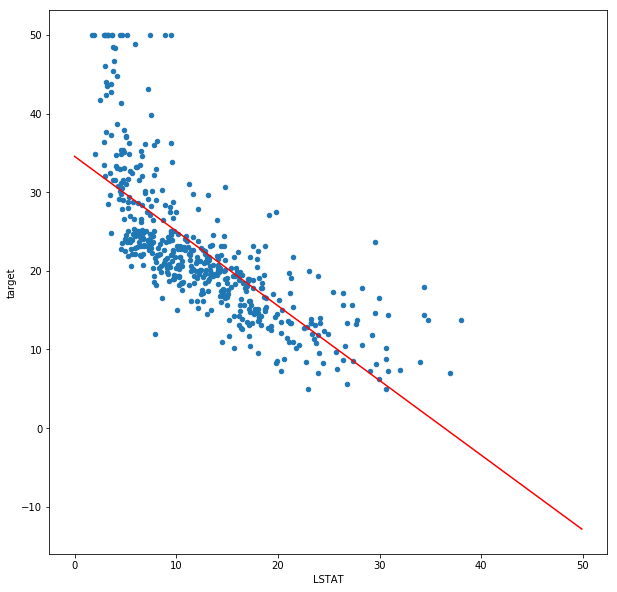

In [248]:
scatter = df.plot(kind = 'scatter', x=predictor, y='target')
regr_line = scatter.plot(xt, linear_predictor.fit(x,y).predict(xt), c = 'r')

### As we can see from the linear plot above, the straight line doesn't follow the curved plot of the datapoints

- Let's try the **quadratic fit**

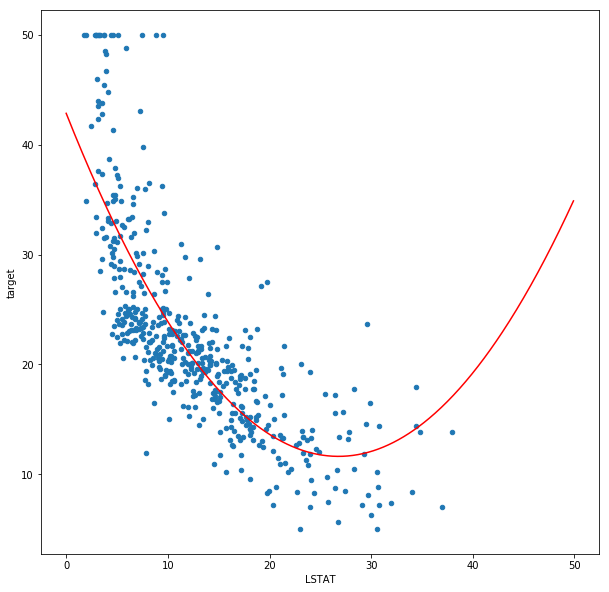

In [249]:
scatter = df.plot(kind = 'scatter', x=predictor, y='target')
regr_line = scatter.plot(xt, quadratic_predictor.fit(x,y).predict(xt), c = 'r')

### This fits the curve a little better initially, but goes way off as `LSTAT` increases

- Let's try the **cubic** fit

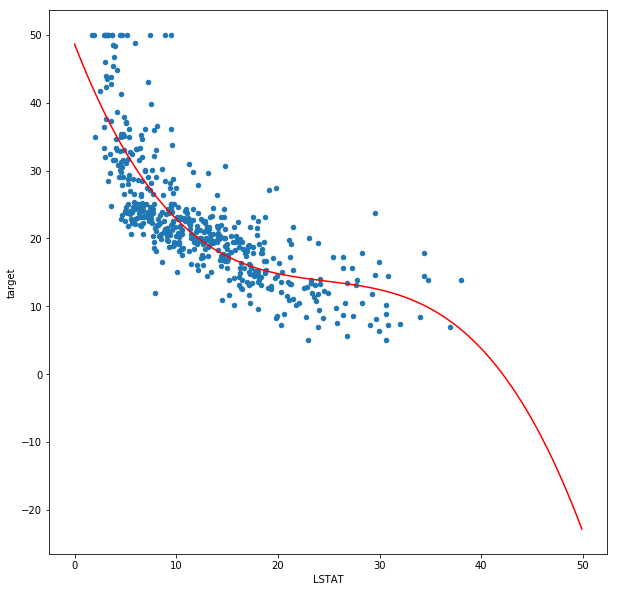

In [250]:
scatter = df.plot(kind = 'scatter', x=predictor, y='target')
regr_line = scatter.plot(xt, cubic_predictor.fit(x,y).predict(xt), c = 'r')

### This looks like the best fit of them all

_____

# Going for higher-degree solutions

- We'll test for higher degree polynomial transformations by looping through different degrees of `PolynomialFeatures` and calculating the R-squared measure for each

In [251]:
df_higher_degree = pd.DataFrame(columns = ['R-squared'], index = [1,2,3,5,15])

for degree in df_higher_degree.index:
    polynomial_object = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
    poly_pipeline = make_pipeline(polynomial_object, StandardScaler(), linear_regression)
    model = poly_pipeline.fit(x,y)
    R2_temp = r2_score(y, model.predict(x))
    df_higher_degree.loc[degree, 'R-squared'] = R2_temp
    
df_higher_degree['Difference'] = df_higher_degree['R-squared'] - df_higher_degree['R-squared'].shift(1)
df_higher_degree

,R-squared,Difference
1,0.544146,NaN
2,0.640717,0.0965706
3,0.657848,0.0171307
5,0.68169,0.0238421
15,0.694524,0.0128343


### As we can see from the Difference column, adding a new degree of transformation to the model increases the R-squared initially, but the improvements are diminishing

In [252]:
df_temp = df[[predictor, 'target']].copy()

for degree in df_higher_degree.index:
    polynomial_object = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
    poly_pipeline = make_pipeline(polynomial_object, StandardScaler(), linear_regression)
    model = poly_pipeline.fit(x,y)
    df_temp[degree] = model.predict(x)
df_temp.set_index('LSTAT', inplace = True)

In [253]:
df_temp.sort_index(inplace = True)

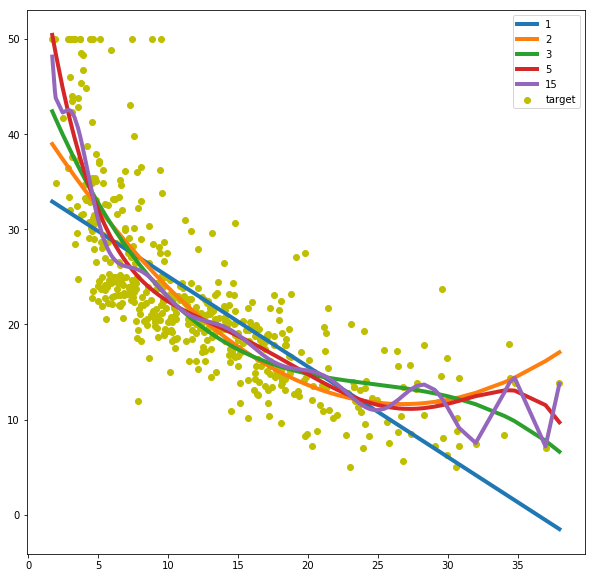

In [254]:
x_vals = df_temp.index
plt.scatter(x_vals, df_temp['target'], color = 'y')
for col in df_temp.iloc[:,1:].columns:
    plt.plot(x_vals, df_temp.loc[:,col], label = col, lw = 4)
plt.legend()
plt.show()

### As we can see from the plot, by the time we hit a degree of 15 we're waaay overfitting the data

_____

# Introducing underfitting and overfitting

- As we can see from the plot above, we can just keep increasing the complexity of the model until it perfectly predicts each point
    - As an example, let's try fitting a model where the degree is really high

C:\Anaconda\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


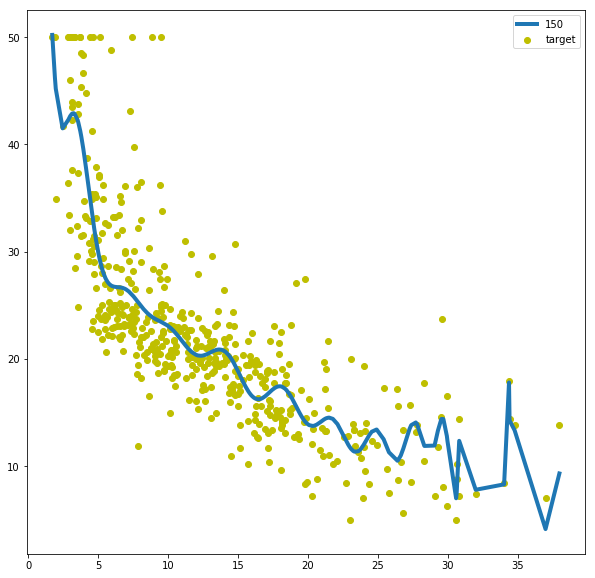

In [262]:
df_temp = df[[predictor, 'target']].copy()

degree = 150
polynomial_object = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
poly_pipeline = make_pipeline(polynomial_object, StandardScaler(), linear_regression)
model = poly_pipeline.fit(x,y)
df_temp[degree] = model.predict(x)
df_temp.set_index('LSTAT', inplace = True)
df_temp.sort_index(inplace = True)

x_vals = df_temp.index
plt.scatter(x_vals, df_temp['target'], color = 'y')
plt.plot(x_vals, df_temp.loc[:,degree], label = degree, lw = 4)
plt.legend()
plt.show()

### This fits the data pretty well

### *So what's the problem?*

- The model won't make accurate predictions for **NEW** data

### Furthermore, increasing the number of predictor variables will also improve the model's predictive power

### But this will just be accurate at predicting outcomes we already know, instead of new outcomes

- The process of training the model to predict each bit of error and randomness in the data is called **overfitting**

- The opposite problem is not giving the model enough information to accurately fit the data
    - This is called **underfitting**
    - E.g. modelling curved data using a straight line of best fit (i.e. using simple linear regression when we should be using polynomial regression)

_____

# Summary

- In this section, we have:
    1. continued learning about linear regression
    2. extended our model from simple to multiple
    3. calculated the coefficients using gradient descent for multiple predictors
    4. looked at multicollinearity
    5. looked at the impact of removing each variable and calculated the partial R-squared
    6. learned about interactions between variables and how to handle them
    7. started fitting higher order polynomials to the data

- In the next chapter on logistic regression, we'll look at predicting whether an event occurs (i.e. predict the probability of something happening)